In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial
from scipy import stats
import warnings

warnings.simplefilter('ignore')

%matplotlib inline

# Задача

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$
в теоретических задачах 6.1, 6.3, 6.4 и 6.5. В задачах 6.1, 6.3 и
6.4 возьмите $\theta = 10,$ в задаче 6.5 возьмите $(\theta, \lambda)
= (10, 3).$ Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
постройте доверительные интервалы, полученные в теоретических
задачах. Изобразите их на графиках в координатах $(n, \theta),$
используя
matplotlib.pyplot.fill\_between.  \\

Для $n = 100$ оцените вероятность попадания истинного значения
$\theta$ в интервал (в каждой задаче). Для этого сгенерируйте
достаточно много выборок (предложите, сколько нужно выборок),
постройте по каждой из них интервалы и определите, сколько раз в
интервалы попадает истинное значение $\theta.$ Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

In [0]:
sample_size = 100
alpha = 0.95
params = {
    "uniform": 10,
    "cauchy": 10,
    "poiss": 10,
    "gamma": (10, 3)
}

Функция для изображения доверительного интервала:

In [0]:
def show_plot(title, sample, gen_ci, theta=10):
    global sample_size
    in_from = np.zeros((sample_size,), dtype=np.float64)
    in_to = np.zeros((sample_size,), dtype=np.float64)
    for i in range(sample_size):
        in_from[i], in_to[i] = gen_ci(sample[:i+1])
    plt.figure(figsize=(20, 10))
    plt.title(title, fontsize=15)
    plt.matplotlib.pyplot.fill_between(
        np.arange(1, sample_size+1, 1), 
        in_from, 
        in_to,
        alpha=0.4)
    plt.plot(
        np.arange(1, sample_size+1, 1), 
        np.full((sample_size,), theta),
        color="red",
        label="$y=\\theta$",
        linewidth=3)
    plt.grid(ls=':')
    plt.legend()
    plt.show()

## Задача №1.1 (6.1)

Построить доверительные интервалы для $\theta$ уровня доверия $\alpha$, используя статистику: 

*   $\overline{X}$
*   $X_{(1)}$
*   $X_{(n)}$



Из теоретической задачи имеет следующие ответы:

*   $\left(\frac{2\bar{X}}{1 + \frac{1}{\sqrt{3n(1-\alpha)}}}; \frac{2\bar{X}}{1 - \frac{1}{\sqrt{3n(1-\alpha)}}}\right)$, получен через неравенство Чебышева - не есть точным
  
*   $\left( X_{(1)}; \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}}\right)$

*   $\left(X_{(n)}; \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}}\right)$ 

Сгенерируем выборку:

In [0]:
uniform_sample = stats.uniform(loc=0, scale=params["uniform"]).rvs(size=sample_size)

### $\overline{X}$

Функция возвращающая доверительный интервал для выборочного среднего

In [0]:
def get_confidence_interval_mean(sample):
    global alpha
    in_from = 2 * sample.mean() 
    in_from /= 1 + 1 / (3 * len(sample) * (1-alpha))**0.5
    in_to = 2 * sample.mean() 
    in_to /= 1 - 1 / (3 * len(sample) * (1-alpha))**0.5
    return (in_from, in_to)

Построим график

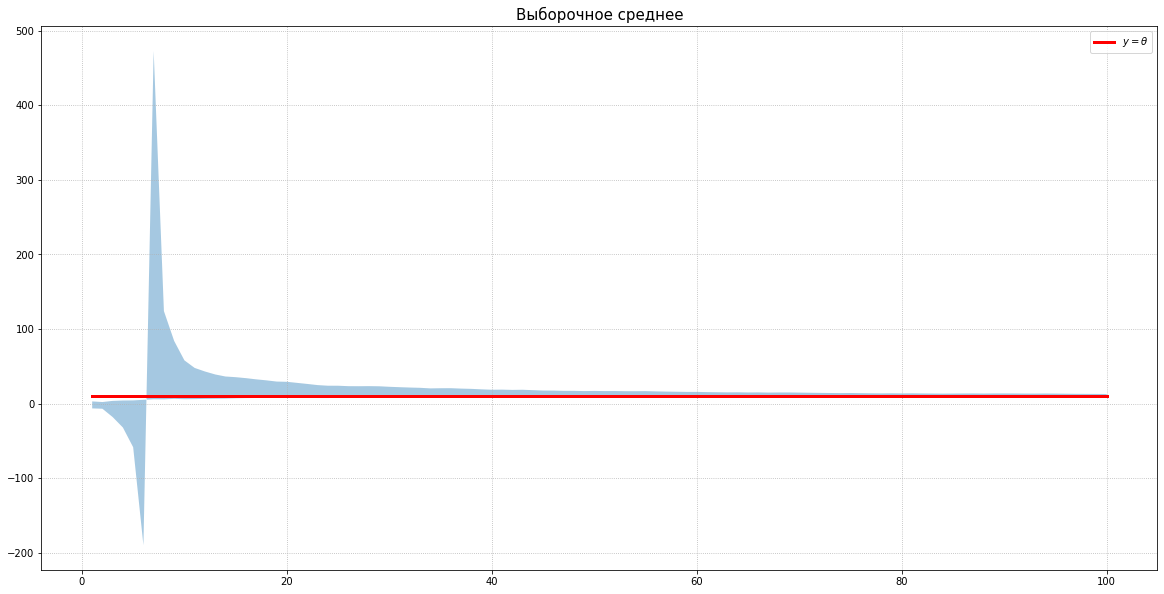

In [0]:
show_plot(
    "Выборочное среднее", 
    uniform_sample, 
    get_confidence_interval_mean
)

### $X_{(1)}$

Функция возвращающая доверительный интервал для первой порядковой статистики

In [0]:
def get_confidence_interval_first(sample):
    global alpha
    in_from = sample.min()
    in_to = sample.min() / (1 - alpha**(1/len(sample)))
    return (in_from, in_to)

Построим график

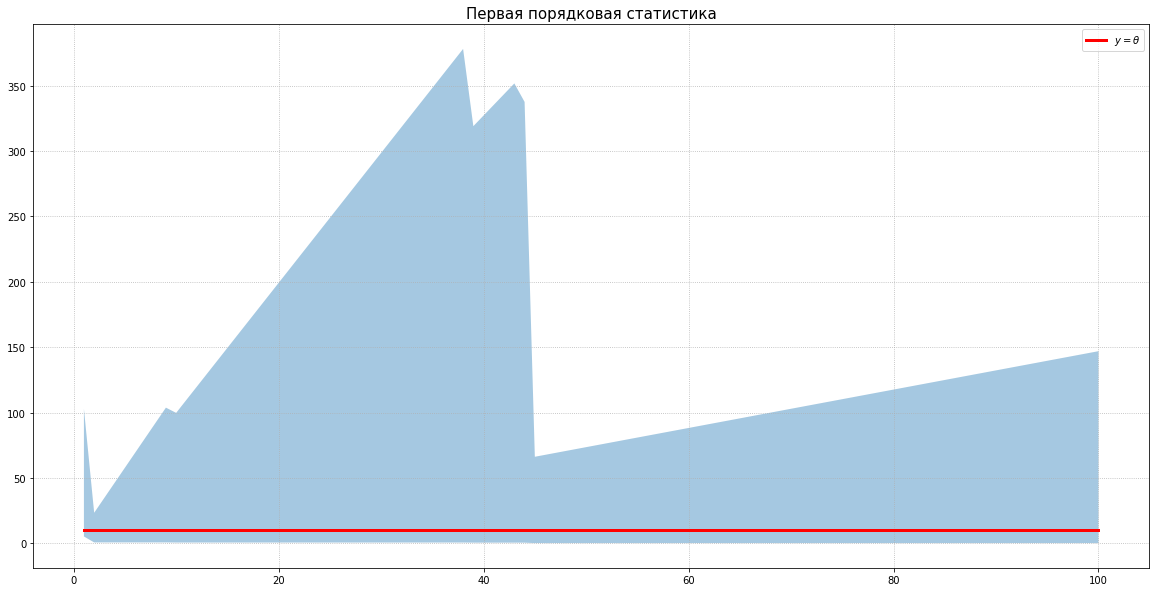

In [0]:
show_plot(
    "Первая порядковая статистика", 
    uniform_sample, 
    get_confidence_interval_first
)

### $X_{(n)}$

Функция возвращающая доверительный интервал для $n$-ой порядковой статистики

In [0]:
def get_confidence_interval_last(sample):
    global alpha
    in_from = sample.max()
    in_to = sample.max() / ((1-alpha) ** (1/len(sample)))
    return (in_from, in_to)

Построим график

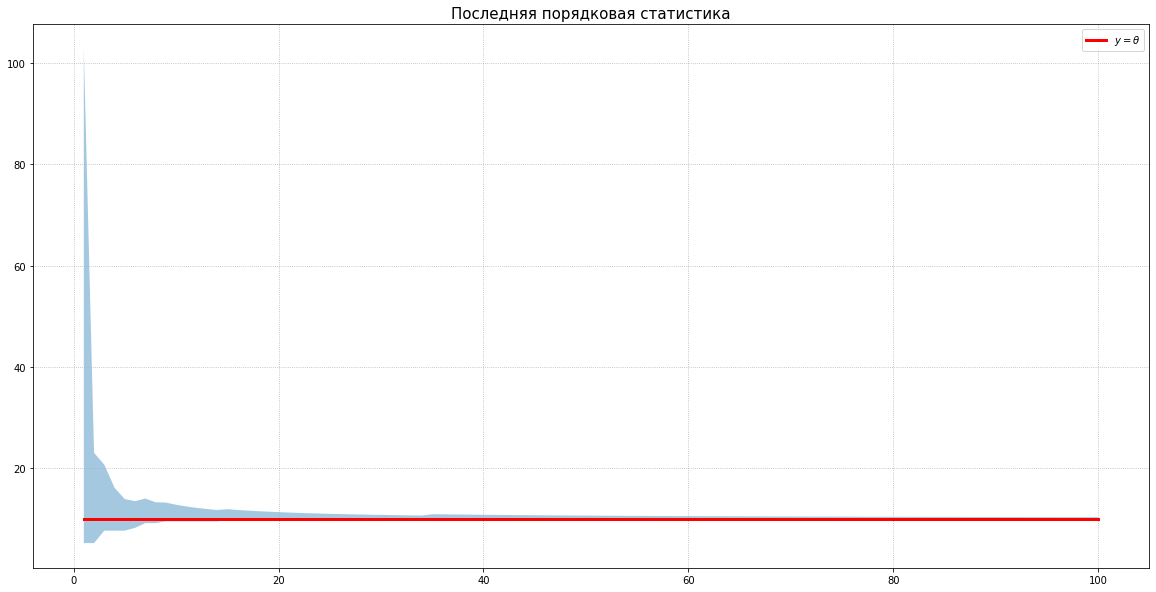

In [0]:
show_plot(
    "Последняя порядковая статистика",
     uniform_sample, 
     get_confidence_interval_last
)

## Вывод №1.1 (6.1)

*   Интервал для $\overline{X}$ дает хорошее приближение (лучше чем для $X_{(1)}$), но является избыточным, т.к. использует нижнюю оценку вероятности, а не точное значение, т.е. не есть точным ДИ.
*   Интервал для $X_{(1)}$ расходится.
*   Интервал для $X_{(n)}$ сходятся вдоль прямой $y=\theta$ и дает хорошую точность

## Задача №1.2 (6.3)



Построить асимптотический доверительный интервал для $\theta$ уровня доверия $\alpha$ для распределения Коши со сдвигом:  
$$ p_{\theta}(x)=\frac{1}{\pi (1+(x-\theta))^2} $$

Асимптотический доверительный интервал уровня доверия $\alpha$ для $Cauchy(\theta, 1)$ есть:  
$$ (\mu - z_{\frac{\alpha+1}{2}}\frac{\pi}{2\sqrt{n}}; \mu + z_{\frac{\alpha+1}{2}}\frac{\pi}{2\sqrt{n}}) $$
($z_{\frac{\alpha+1}{2}}$ $\frac{\alpha+1}{2}$--квантиль для стандартного нормального распределения, $\mu$-выборочная медиана)

Сгенерируем выборку:

In [0]:
cauchy_sample = stats.cauchy(loc=params["cauchy"], scale=1).rvs(size=sample_size)

Функция возвращающая АДИ по выборке для распределения Коши из задачи

In [0]:
def get_asympt_confidence_interval_cauchy(sample):
    global alpha
    in_from = np.median(sample) - \
        stats.norm.ppf((1+alpha)/2) * np.pi / 2 / (sample.size**0.5)
    in_to = np.median(sample) + \
        stats.norm.ppf((1+alpha)/2) * np.pi / 2 / (sample.size**0.5)
    return (in_from, in_to)

Построим график

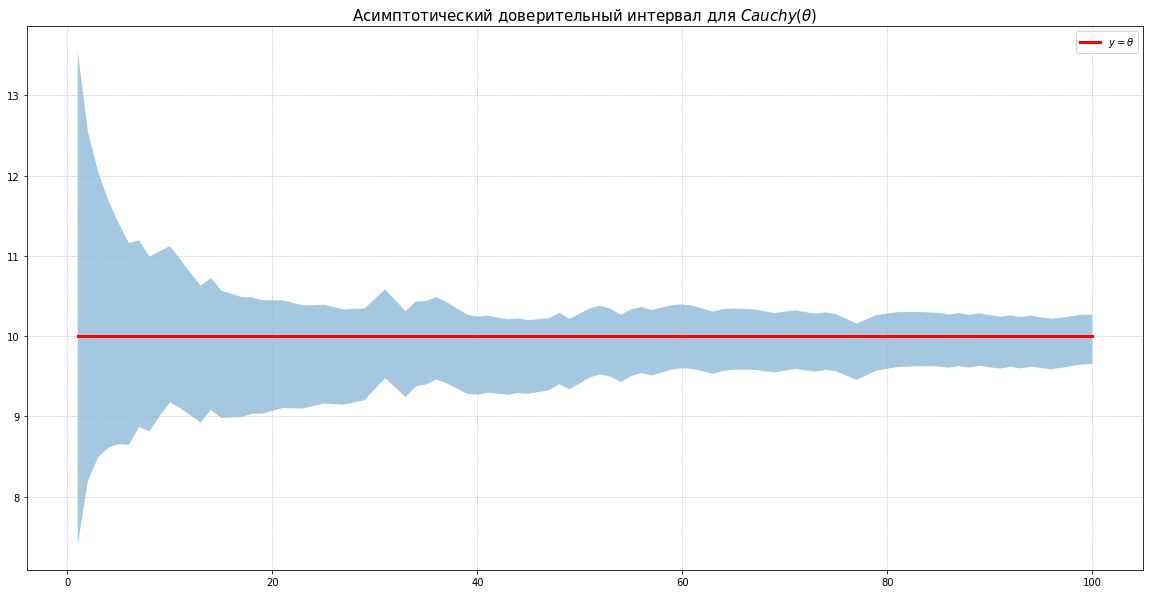

In [0]:
show_plot(
    "Асимптотический доверительный интервал для $Cauchy(\\theta)$",
     cauchy_sample, 
     get_asympt_confidence_interval_cauchy
)

## Вывод №1.2 (6.3)

Согласно построенному графику, видно, что АДИ сходится вдоль прямой $y=\theta$.

## Задача №1.3 (6.4)

Построить асимптотический доверительный интервал для $\theta$ уровня доверия $\alpha$ для пуассоновского распределения с параметром $\theta$.

Асимптотический доверительный интервал для пуассоновского распределения уровня доверия $\alpha$ есть:  
$$ \left(\overline{X} - z_{\frac{\alpha+1}{2}}\frac{\overline{X}}{\sqrt{n}}; \overline{X} - z_{\frac{\alpha+1}{2}}\frac{\overline{X}}{\sqrt{n}}\right) $$
($z_{\frac{\alpha+1}{2}}$ $\frac{\alpha+1}{2}$--квантиль для стандартного нормального распределения)

Сгенерируем выборку:

In [0]:
poiss_sample = stats.poisson(mu=params["poiss"]).rvs(size=sample_size)

Функция возвращающая АДИ по выборке для пуассоновского распределения из задачи

In [0]:
def get_asympt_confidence_interval_poiss(sample):
    global alpha
    in_from = np.median(sample) - \
        stats.norm.ppf((1+alpha)/2) * sample.mean()/(sample.size)**0.5
    in_to = np.median(sample) + \
        stats.norm.ppf((1+alpha)/2) * sample.mean()/(sample.size)**0.5
    return (in_from, in_to)

Построим график

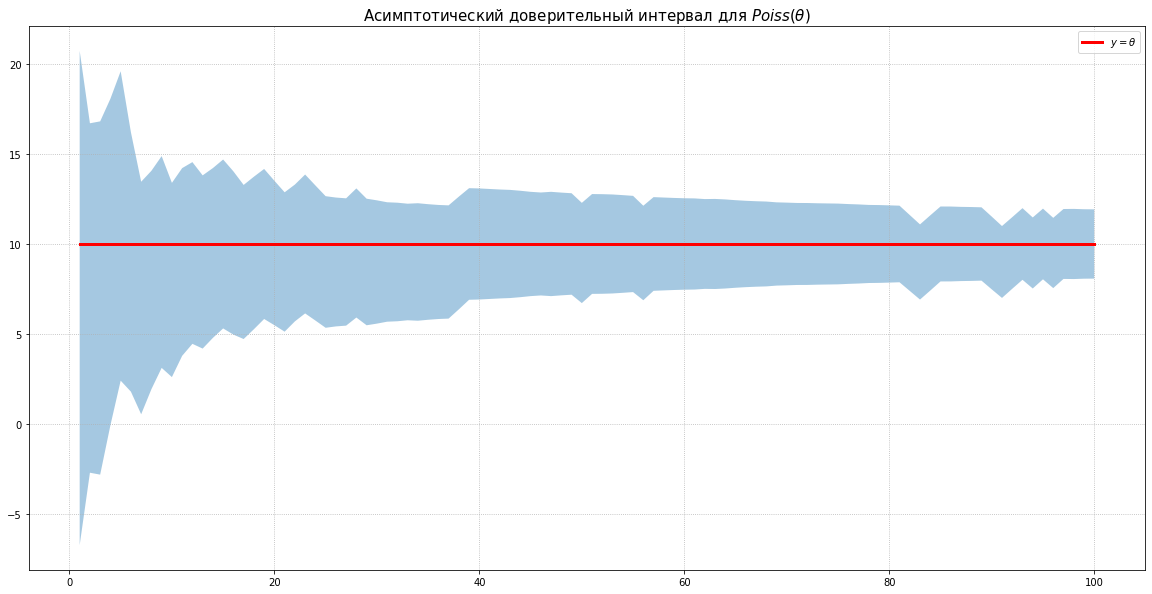

In [0]:
show_plot(
    "Асимптотический доверительный интервал для $Poiss(\\theta)$",
     poiss_sample, 
     get_asympt_confidence_interval_poiss
)

## Вывод №1.3 (6.4)

Согласно построенному графику, видно, что АДИ сходится вдоль прямой $y=\theta$.

## Задача №1.4 (6.5)

Построить асимптотический доверительный интервал для $\theta$ уровня доверия $\alpha$ для гамма распределения с параметром ($\theta$, $\lambda$).

Асимптотический доверительный интервал для гамма распределения уровня доверия $\alpha$ есть:  
$$ \left(\frac{\lambda-z_{\frac{\alpha+1}{2}}\sqrt{\frac{\lambda}{n}}}{\overline{X}}; \frac{\lambda+z_{\frac{\alpha+1}{2}}\sqrt{\frac{\lambda}{n}}}{\overline{X}}\right) $$  
($z_{\frac{\alpha+1}{2}}$ $\frac{\alpha+1}{2}$--квантиль для стандартного нормального распределения)


Сгенерируем выборку:

In [0]:
gamma_sample = stats.gamma(
    a=params["gamma"][1],
    scale=1/params["gamma"][0]
).rvs(size=sample_size)

Функция возвращающая АДИ по выборке для гамма распределения из задачи

In [0]:
def get_asympt_confidence_interval_gamma(sample):
    global alpha, params
    lambda_ = params["gamma"][1]
    in_from = lambda_ - stats.norm.ppf((1+alpha)/2) * (lambda_/sample.size)**0.5
    in_from /= sample.mean()
    in_to = lambda_ + stats.norm.ppf((1+alpha)/2) * (lambda_/sample.size)**0.5
    in_to /= sample.mean()
    return (in_from, in_to)

Построим график

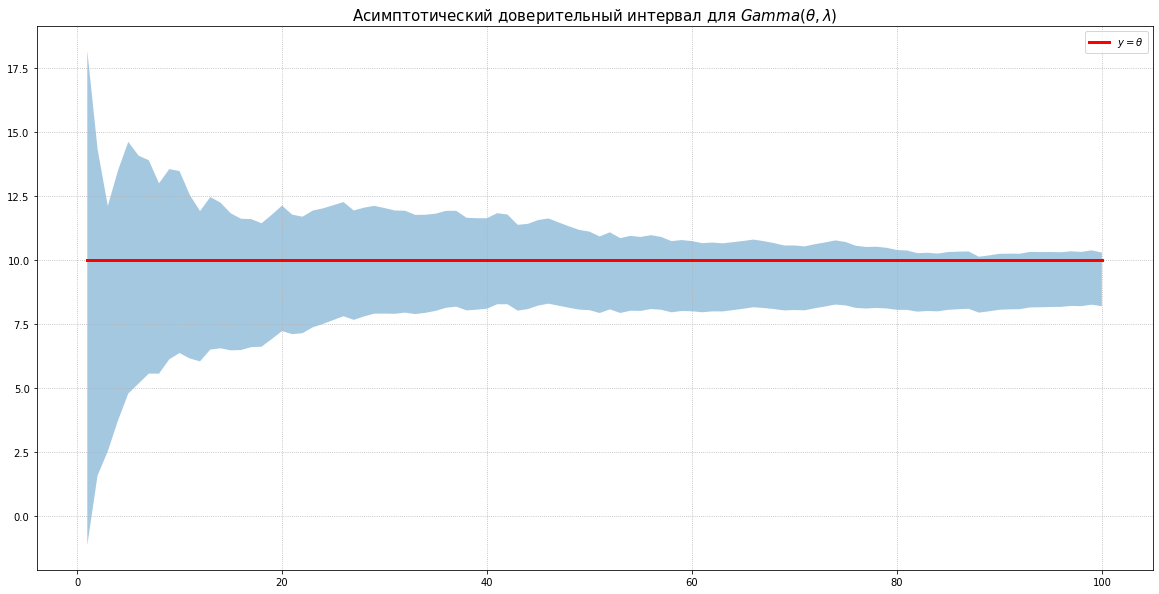

In [0]:
show_plot(
    "Асимптотический доверительный интервал для $Gamma(\\theta, \lambda)$",
     gamma_sample, 
     get_asympt_confidence_interval_gamma
)

## Вывод №1.4 (6.5)

Согласно построенному графику, видно, что АДИ сходится вдоль прямой $y=\theta$.

## Задача №2

Для $n=100$  оценим вероятность попадания истинного значения $\theta$ в интервал (в каждой задаче).

Для каждой распределения будем генерировать по 1000 выборок.

In [0]:
theta, samples_amt = 10, 1000
intervals = {
    "uniform_mean":  get_confidence_interval_mean,
    "uniform_first": get_confidence_interval_first,
    "uniform_last":  get_confidence_interval_last,
    "cauchy":        get_asympt_confidence_interval_cauchy,
    "poiss":         get_asympt_confidence_interval_poiss,
    "gamma":         get_asympt_confidence_interval_gamma
}
rvs_generators = {
    "uniform_mean":  stats.uniform(loc=0, scale=params["uniform"]),
    "uniform_first": stats.uniform(loc=0, scale=params["uniform"]),
    "uniform_last":  stats.uniform(loc=0, scale=params["uniform"]),
    "cauchy":        stats.cauchy(loc=params["cauchy"], scale=1),
    "poiss":         stats.poisson(mu=params["poiss"]),
    "gamma":         stats.gamma(a=params["gamma"][1], scale=1/params["gamma"][0])
}

In [0]:
for title, interval in intervals.items():
    hits_amt = 0
    for _ in range(samples_amt):
        sample = rvs_generators[title].rvs(size=sample_size)
        in_from, in_to = intervals[title](sample)
        if in_from <= theta <= in_to:
            hits_amt += 1
    print(f"""
        Задание: {title}
        Вероятность попадания: {np.round(hits_amt/1000, decimals=3)}
    """)


        Задание: uniform_mean
        Вероятность попадания: 1.0
    

        Задание: uniform_first
        Вероятность попадания: 0.95
    

        Задание: uniform_last
        Вероятность попадания: 0.945
    

        Задание: cauchy
        Вероятность попадания: 0.94
    

        Задание: poiss
        Вероятность попадания: 1.0
    

        Задание: gamma
        Вероятность попадания: 0.966
    


# Вывод №2

Как видим, вероятность попадания всегда ~$0.95$, что говорит о хорошем приближении построенными доверительными интервалами.